In [1]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import random
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18')
from colossus.halo import concentration, mass_defs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Volumes/Extreme_SSD/codes/master_thesis/code/configs/apjfonts}')
from matplotlib.lines import Line2D
sz_ft = 18
sz_lb = 18
color_arr = ['firebrick', 'deepskyblue', 'seagreen', 'orange']
from tqdm import tqdm
import cosmo
import lensing_estimator
from cosmo import CosmoCalc
import lensing
import foregrounds as fg
import experiments as exp
import sims
import stats
import tools
import ilc

## General Settings

In [2]:
nber_clus = 3000
nber_rand = 50000
nber_cov = 1000
nber_runs = 25
map_params = [180, 0.5, 180, 0.5] 
l, cl = CosmoCalc().cmb_power_spectrum()
z = 0.7
cluster = [2e14, cosmo.concentration_parameter(2e14, z, 0.674), z]
l, bl = exp.beam_power_spectrum(beam_fwhm = 1.4)
mass_int = np.arange(0, 4, 0.1)

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))


In [3]:
l, cl_residual_spt_3g, res_ilc_dic_spt_3g, weights_arr_spt_3g = ilc.residuals_and_weights(components = 'all', experiment = 'spt_3g', cov_from_sims = True)
cl_noise_spt_3g =  cl_residual_spt_3g

l, cl_residual_so, res_ilc_dic_so, weights_arr_so = ilc.residuals_and_weights(components = 'all', experiment = 'so_lat', cov_from_sims = True)
cl_noise_so =  cl_residual_so

l, cl_residual_fyst, res_ilc_dic_fyst, weights_arr_fyst = ilc.residuals_and_weights(components = 'all', experiment = 'so_lat_fyst', cov_from_sims = True)
cl_noise_fyst =  cl_residual_fyst

l, cl_residual_s4wide, res_ilc_dic_s4wide, weights_arr_s4wide = ilc.residuals_and_weights(components = 'all', experiment = 's4wide', cov_from_sims = True)
cl_noise_s4wide =  cl_residual_s4wide

cl_residuals = [cl_residual_spt_3g, cl_residual_so, cl_residual_fyst, cl_residual_s4wide]

/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:200: RuntimeWarning: divide by zero encountered in power
  nl_red = n_red*(l/elknee)**alphaknee
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:83: RuntimeWarning: divide by zero encountered in true_divide
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:83: RuntimeWarning: invalid value encountered in multiply
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:113: RuntimeWarning: divide by zero encountered in true_divide
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:113: RuntimeWarning: invalid value encountered in multiply
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:130: RuntimeWarning: divide by zero encountered in true_divide
  cl_tsz =  (2*np.pi)/(l * (l+1)) * dl_tsz
/Volumes/Extreme_SSD/codes/m

## SNR for SO LAT, SO LAT + FYST, S4-Wide

In [4]:
%%script false --no-raise-error
maps_rand_spt_3g = sims.cmb_forecast_data(experiment = 'spt_3g', map_params = map_params, l = l, cl = cl, cl_residual = cl_residual_spt_3g, bl = bl, nber_obs = nber_rand)
stack_bg_spt_3g = lensing_estimator.stack(map_params, maps_rand_spt_3g, l = l, cl = cl, cl_noise = cl_noise_spt_3g)                                       
del maps_rand_spt_3g
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_spt_3g.npy', stack_bg_spt_3g)  


maps_rand_so = sims.cmb_forecast_data(experiment = 'so_lat', map_params = map_params, l = l, cl = cl, cl_residual = cl_residual_so, bl = bl, nber_obs = nber_rand)
stack_bg_so = lensing_estimator.stack(map_params, maps_rand_so, l = l, cl = cl, cl_noise = cl_noise_so)                                       
del maps_rand_so
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_so.npy', stack_bg_so)  

maps_rand_fyst = sims.cmb_forecast_data(experiment = 'so_lat_fyst', map_params = map_params, l = l, cl = cl, cl_residual = cl_residual_fyst, bl = bl, nber_obs = nber_rand)
stack_bg_fyst = lensing_estimator.stack(map_params, maps_rand_fyst, l = l, cl = cl, cl_noise = cl_noise_fyst)                                       
del maps_rand_fyst
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_fyst.npy', stack_bg_fyst) 


maps_rand_s4wide = sims.cmb_forecast_data(experiment = 's4wide', map_params = map_params, l = l, cl = cl, cl_residual = cl_residual_s4wide, bl = bl, nber_obs = nber_rand)
stack_bg_s4wide = lensing_estimator.stack(map_params, maps_rand_s4wide, l = l, cl = cl, cl_noise = cl_noise_s4wide)                                       
del maps_rand_s4wide
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_s4wide.npy', stack_bg_s4wide)   

In [5]:
%%script false --no-raise-error
covariance_matrix_spt_3g, _ = lensing_estimator.covariance_and_correlation_matrix(nber_cov, nber_clus, map_params, l, cl, bl = bl, experiment = 'spt_3g', components = 'all', cl_noise = cl_noise_spt_3g)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_spt_3g.npy', covariance_matrix_spt_3g)

covariance_matrix_so, _ = lensing_estimator.covariance_and_correlation_matrix(nber_cov, nber_clus, map_params, l, cl, bl = bl, experiment = 'so_lat', components = 'all', cl_noise = cl_noise_so)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_so.npy', covariance_matrix_so)

covariance_matrix_fyst, _ = lensing_estimator.covariance_and_correlation_matrix(nber_cov, nber_clus, map_params, l, cl, bl = bl, experiment = 'so_lat_fyst', components = 'all', cl_noise = cl_noise_fyst)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_fyst.npy', covariance_matrix_fyst)

covariance_matrix_s4wide, _ = lensing_estimator.covariance_and_correlation_matrix(nber_cov, nber_clus, map_params, l, cl, bl = bl, experiment = 's4wide', components = 'all', cl_noise = cl_noise_s4wide)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_s4wide.npy', covariance_matrix_s4wide)

In [6]:
%%script false --no-raise-error
model_profiles_spt_3g = lensing_estimator.model_profiles(nber_clus, map_params, l, cl, mass_int, z, bl = bl, cl_noise = cl_noise_spt_3g)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_spt_3g.npy', model_profiles_spt_3g)

In [7]:
%%script false --no-raise-error
model_profiles_so = lensing_estimator.model_profiles(nber_clus, map_params, l, cl, mass_int, z, bl = bl, cl_noise = cl_noise_so)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_so.npy', model_profiles_so)

model_profiles_fyst = lensing_estimator.model_profiles(nber_clus, map_params, l, cl, mass_int, z, bl = bl, cl_noise = cl_noise_fyst)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_fyst.npy', model_profiles_fyst)

model_profiles_s4wide = lensing_estimator.model_profiles(nber_clus, map_params, l, cl, mass_int, z, bl = bl, cl_noise = cl_noise_s4wide)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_s4wide.npy', model_profiles_s4wide)

In [8]:
%%script false --no-raise-error
stack_bg_spt_3g = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_spt_3g.npy')   
covariance_matrix_spt_3g = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_spt_3g.npy')
stack_bg_so = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_so.npy')   
covariance_matrix_so = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_so.npy')
model_profiles_so = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_so.npy')
stack_bg_fyst = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_fyst.npy')   
covariance_matrix_fyst = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_fyst.npy')
model_profiles_fyst = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_fyst.npy')
stack_bg_s4wide = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_s4wide.npy')   
covariance_matrix_s4wide = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_s4wide.npy')
model_profiles_s4wide = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_s4wide.npy')


lk_arr_spt_3g = [] 
lk_arr_so = []  
lk_arr_fyst = []   
lk_arr_s4wide = []   
for i in tqdm(range(nber_runs)):  
    maps_clus = sims.cmb_forecast_test_data(map_params, l, cl, cluster = cluster, cl_residuals = cl_residuals, bl = bl, nber_obs = nber_clus)
    maps_clus_spt_3g, maps_clus_so, maps_clus_fyst, maps_clus_s4wide = maps_clus
    
    stack_clus_spt_3g = lensing_estimator.stack(map_params, maps_clus_spt_3g, l = l, cl = cl, cl_noise = cl_noise_spt_3g)
    stack_clus_so = lensing_estimator.stack(map_params, maps_clus_so, l = l, cl = cl, cl_noise = cl_noise_so)
    stack_clus_fyst = lensing_estimator.stack(map_params, maps_clus_fyst, l = l, cl = cl, cl_noise = cl_noise_fyst)
    stack_clus_s4wide = lensing_estimator.stack(map_params, maps_clus_s4wide, l = l, cl = cl, cl_noise = cl_noise_s4wide)
        
    bins_spt_3g, lensing_dipole_profile_spt_3g, stack_dipole_spt_3g = lensing_estimator.lensing_dipole(map_params, stack_clus_spt_3g, stack_bg_spt_3g)
    bins_so, lensing_dipole_profile_so, stack_dipole_so = lensing_estimator.lensing_dipole(map_params, stack_clus_so, stack_bg_so)
    bins_fyst, lensing_dipole_profile_fyst, stack_dipole_fyst = lensing_estimator.lensing_dipole(map_params, stack_clus_fyst, stack_bg_fyst)
    bins_s4wide, lensing_dipole_profile_s4wide, stack_dipole_s4wide = lensing_estimator.lensing_dipole(map_params, stack_clus_s4wide, stack_bg_s4wide)
    
    data_spt_3g = bins_so, lensing_dipole_profile_spt_3g, covariance_matrix_spt_3g
    data_so = bins_so, lensing_dipole_profile_so, covariance_matrix_so
    data_fyst = bins_fyst, lensing_dipole_profile_fyst, covariance_matrix_fyst
    data_s4wide = bins_s4wide, lensing_dipole_profile_s4wide, covariance_matrix_s4wide
   
    likelihood_spt_3g, _, _ = stats.run_ml(data_spt_3g, model_profiles_spt_3g, mass_int, normalize = False)
    mass_int_lk_spt_3g, lk_spt_3g = likelihood_spt_3g
    lk_arr_spt_3g.append(lk_spt_3g)
    likelihood_so, _, _ = stats.run_ml(data_so, model_profiles_so, mass_int, normalize = False)
    mass_int_lk_so, lk_so = likelihood_so
    lk_arr_so.append(lk_so)
    likelihood_fyst, _, _ = stats.run_ml(data_fyst, model_profiles_fyst, mass_int, normalize = False)
    mass_int_lk_fyst, lk_fyst = likelihood_fyst
    lk_arr_fyst.append(lk_fyst)
    likelihood_s4wide, _, _ = stats.run_ml(data_s4wide, model_profiles_s4wide, mass_int, normalize = False)
    mass_int_lk_s4wide, lk_s4wide = likelihood_s4wide
    lk_arr_s4wide.append(lk_s4wide)    
    
    del maps_clus
    del maps_clus_spt_3g
    del maps_clus_so
    del maps_clus_fyst
    del maps_clus_s4wide


comb_lk_spt_3g, mass_value_comb_lk_spt_3g, error_comb_lk_spt_3g = stats.combined_likelihood(mass_int_lk_spt_3g, lk_arr_spt_3g, normalize = False)    
comb_lk_so, mass_value_comb_lk_so, error_comb_lk_so = stats.combined_likelihood(mass_int_lk_so, lk_arr_so, normalize = False)
comb_lk_fyst, mass_value_comb_lk_fyst, error_comb_lk_fyst = stats.combined_likelihood(mass_int_lk_fyst, lk_arr_fyst, normalize = False) 
comb_lk_s4wide, mass_value_comb_lk_s4wide, error_comb_lk_s4wide = stats.combined_likelihood(mass_int_lk_s4wide, lk_arr_s4wide, normalize = False) 

snr_spt_3g = stats.signal_to_noise(comb_lk_spt_3g)
snr_so = stats.signal_to_noise(comb_lk_so)
snr_fyst = stats.signal_to_noise(comb_lk_fyst)
snr_s4wide = stats.signal_to_noise(comb_lk_s4wide)


snr_arr = [snr_spt_3g, snr_so, snr_fyst, snr_s4wide]

np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/snr.npy', snr_arr) 
snr_results = "{0:11.3f}".format(snr_spt_3g) + "\n"
snr_results = "{0:11.3f}".format(snr_so) + "\n"
snr_results += "{0:11.3f}".format(snr_fyst) + "\n"          
snr_results += "{0:11.3f}".format(snr_s4wide) + "\n"

file = open('/Volumes/Extreme_SSD/codes/master_thesis/code/results/snr.txt',"w")
file.write(snr_results)
file.close() 

In [9]:
%%script false --no-raise-error
def combined_likelihood(x, likelihood_arr):
    comb_lk = np.zeros(len(likelihood_arr[0]))
    for i in range(len(likelihood_arr)):
        comb_lk += np.log(likelihood_arr[i]) 
    return comb_lk

comb_lk_spt_3g = combined_likelihood(mass_int_lk_spt_3g, lk_arr_spt_3g)
comb_lk_so = combined_likelihood(mass_int_lk_so, lk_arr_so)
comb_lk_fyst = combined_likelihood(mass_int_lk_fyst, lk_arr_fyst) 
comb_lk_s4wide = combined_likelihood(mass_int_lk_s4wide, lk_arr_s4wide) 


def signal_to_noise(lnpdf):
    delta_chisq = 2*(max(lnpdf) - lnpdf[0])
    snr = np.sqrt(delta_chisq)
    return snr

snr_spt_3g = signal_to_noise(comb_lk_spt_3g)
snr_so = signal_to_noise(comb_lk_so)
snr_fyst = signal_to_noise(comb_lk_fyst)
snr_s4wide = signal_to_noise(comb_lk_s4wide)

snr_arr = [snr_spt_3g, snr_so, snr_fyst, snr_s4wide]
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/snr.npy', snr_arr) 

snr_results = "{0:11.3f}".format(snr_spt_3g) + "\n"
snr_results = "{0:11.3f}".format(snr_so) + "\n"
snr_results += "{0:11.3f}".format(snr_fyst) + "\n"          
snr_results += "{0:11.3f}".format(snr_s4wide) + "\n"

file = open('/Volumes/Extreme_SSD/codes/master_thesis/code/results/snr.txt',"w")
file.write(snr_results)
file.close() 

## Plots

In [10]:
specs_dic, corr_noise_bands, rho = exp.specs('so_lat')
freq_arr = sorted( specs_dic.keys() )
beam_fwhm_arr, whitenoise_arr, rednoise_arr, elknee_arr, alphaknee_arr = [], [], [], [], []
for freq in freq_arr:
    beam_fwhm, noiseval_white, noiseval_red, elknee, alphaknee = specs_dic[freq]
    beam_fwhm_arr.append(beam_fwhm)
    whitenoise_arr.append(noiseval_white)
    rednoise_arr.append(noiseval_red)
    elknee_arr.append(elknee)
    alphaknee_arr.append(alphaknee) 


beam_arr = []
for i in range(len(beam_fwhm_arr)):
    l, bl = exp.beam_power_spectrum(beam_fwhm_arr[i])
    beam_arr.append(np.sqrt(bl))     
    
noise_power_white_arr = []
for i in range(len(whitenoise_arr)):
    l, nl = exp.white_noise_power_spectrum(whitenoise_arr[i])
    noise_power_white_arr.append(nl)    
    
noise_power_red_arr = []
for i in range(len(rednoise_arr)):
    l, nl = exp.red_noise_power_spectrum(rednoise_arr[i], elknee_arr[i], alphaknee_arr[i])
    noise_power_red_arr.append(nl)
    
l, nl_dic = exp.noise_power_spectra_dic(experiment = 'so_lat', deconvolve = False, use_cross_power = False)
noise_power_arr = []
for freq in freq_arr:
    noise_power_arr.append(nl_dic[freq])

/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:200: RuntimeWarning: divide by zero encountered in power
  nl_red = n_red*(l/elknee)**alphaknee
/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:207: RuntimeWarning: divide by zero encountered in power
  nl_red2= n_red2*(l/elknee2)**alphaknee2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


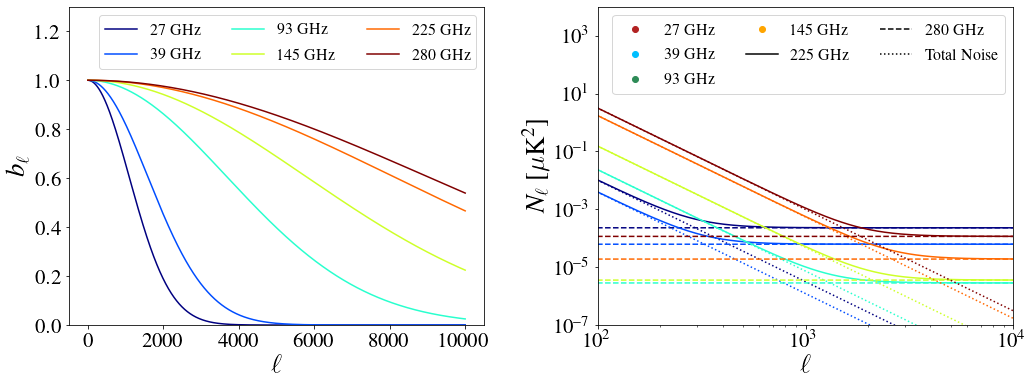

In [11]:
fig, axarr = plt.subplots(1,2, figsize=(15,6))
cmap = cm.jet
color_grad = [cmap(int(d)) for d in np.linspace(0, 255, len(freq_arr))]

for i in range(len(freq_arr)):
    axarr[0].plot(l, beam_arr[i],  color = color_grad[i], label = str(freq_arr[i])+' GHz')
axarr[0].set_xlabel(r'$\ell$', fontsize = sz_ft+9)
axarr[0].set_ylabel(r'$b_{\ell}$', fontsize = sz_ft+9)
axarr[0].set_ylim(0,1.3)
axarr[0].tick_params(labelsize = sz_lb+3)
axarr[0].legend(ncol = 3, prop={'size': sz_lb-2}) 

for i in range(len(freq_arr)):
    axarr[1].plot(l, noise_power_arr[i],  color = color_grad[i], ls = '-')
    axarr[1].plot(l, noise_power_white_arr[i],  color = color_grad[i], ls = '--')
    axarr[1].plot(l, noise_power_red_arr[i],  color = color_grad[i], ls = ':')

axarr[1].set_ylabel(r'$N_{\ell}\ [\mu$'+'K'+r'$^2]$', fontsize = sz_ft+9)
axarr[1].set_xlabel(r'$\ell$', fontsize = sz_ft+9)
axarr[1].tick_params(labelsize = sz_lb+3)
axarr[1].set_xscale('log')
axarr[1].set_yscale('log')
axarr[1].set_xlim(100, 10000) 
axarr[1].set_ylim(1e-7, 1e4)
patches = [Line2D([0], [0], color = c, marker='o', ls = '') for c in color_arr]
patches+= [Line2D([0], [0], color='black',linestyle='-')]
patches+= [Line2D([0], [0], color='black',linestyle='--')]
patches+= [Line2D([0], [0], color='black',linestyle=':')]
labels = [str(freq_arr[0])+' GHz', str(freq_arr[1])+' GHz', str(freq_arr[2])+' GHz', str(freq_arr[3])+' GHz',
          str(freq_arr[4])+' GHz', str(freq_arr[5])+' GHz','Total Noise', 'White Noise', 'Red Noise']
axarr[1].legend(patches, labels, ncol = 3, prop={'size': sz_lb-2})

fig.tight_layout(pad=3)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/beam_and_noise_so_lat.eps', dpi = 200, bbox_inches = 'tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


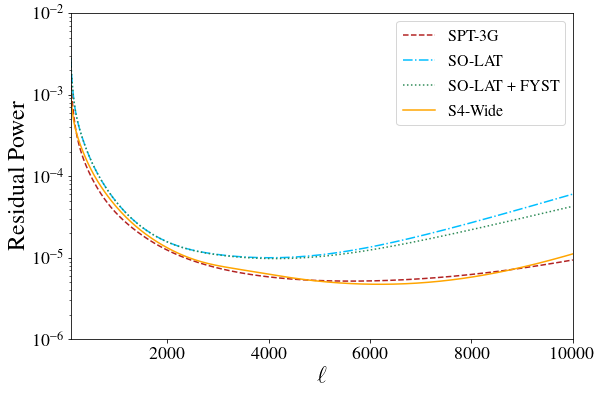

In [12]:
fig, ax = plt.subplots(figsize=(9,6))


ax.set_yscale('log')
ax.plot(l, cl_residual_spt_3g-res_ilc_dic_spt_3g['ksz'], label = 'SPT-3G', color = color_arr[0], ls = '--')
ax.plot(l, cl_residual_so-res_ilc_dic_so['ksz'], label = 'SO-LAT', color = color_arr[1], ls = '-.')
ax.plot(l, cl_residual_fyst-res_ilc_dic_fyst['ksz'], label = 'SO-LAT + FYST', color = color_arr[2], ls = ':')
ax.plot(l, cl_residual_s4wide-res_ilc_dic_s4wide['ksz'], label = 'S4-Wide', color = color_arr[3], ls = '-')
ax.set_ylabel('Residual Power', fontsize = sz_ft+6)
ax.set_xlabel(r'$\ell$', fontsize = sz_ft+6)
ax.tick_params(labelsize = sz_lb)
ax.set_xlim(100, 10000)
ax.set_ylim(1e-6, 1e-2)
ax.legend(prop={'size': sz_lb-2}) 

plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/residuals.eps', dpi = 200.)

[12.111523438444893, 19.976319313961053, 20.553669583150675, 56.00297611139369]


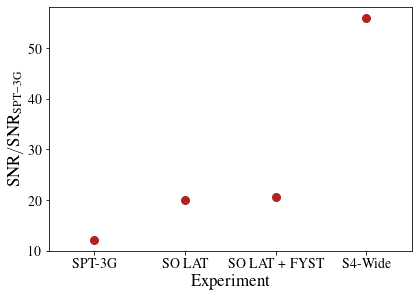

In [13]:
fig, ax = plt.subplots(figsize=(6.5,4.5))
experiments = ['SPT-3G', 'SO LAT', 'SO LAT + FYST', 'S4-Wide']
#snr_arr = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/snr.npy') 
snr_arr = [38.3, 34.6, 35.6, 48.5]
scale_fracs = [np.sqrt(0.1), np.sqrt(1/3), np.sqrt(1/3), np.sqrt(4/3)]
snr_arr_scaled = [snr_arr[i]*scale_fracs[i] for i in range(len(snr_arr))]
plt.plot(experiments, snr_arr_scaled, ls = '', marker = 'o', markersize = sz_lb-10, color = color_arr[0])
print(snr_arr_scaled)
ax.set_xlabel('Experiment', fontsize = sz_ft-1)
plt.ylabel(r'$\rm SNR/ \rm SNR_{\rm SPT-3G}$', fontsize = sz_ft-1)
ax.set_xlim(-0.5,3.5)
ax.tick_params(labelsize = sz_lb-4)
plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/forecasts.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)

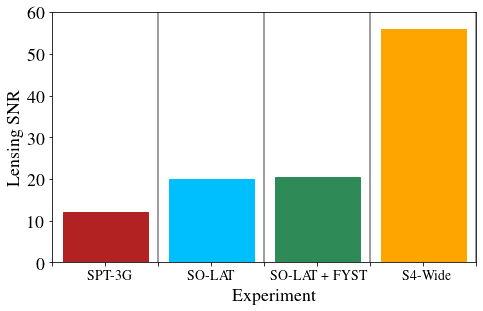

In [14]:
from pylab import *
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold')
import os

snr_dic={}

#experiments - 
cases_arr=['']
snr_dic['spt3g']=[snr_arr_scaled[0]]
snr_dic['so']=[snr_arr_scaled[1]] #list contains SNR for baseline, with centroid shifts, with kSZ, with tSZ correction, all
snr_dic['so_fyst']=[snr_arr_scaled[2]] #list contains SNR for baseline, with centroid shifts, with kSZ, with tSZ correction, all
snr_dic['s4wide']=[snr_arr_scaled[3]] #list contains SNR for baseline, with centroid shifts, with kSZ, with tSZ correction, all
exp_dic = {'spt3g': 'SPT-3G', 'so': 'SO-LAT', 'so_fyst': 'SO-LAT + FYST', 's4wide': 'S4-Wide'}

#make bar plots
fsval = 12
yscale_val = None #'log'
ymin, ymax = 0., 60.
exparr = snr_dic.keys()
xcntr = 0.
barwidth = 1.
exp_gap = barwidth * 2.
xincrement = exp_gap*barwidth
#ax = subplot(111, yscale = yscale_val)
fig, ax = plt.subplots(figsize=(7.6,4.6))
for expcntr, expname in enumerate( exparr ): #loop for experiments
    snr_arr = snr_dic[expname]
    bar(xcntr, snr_arr[0], width = barwidth+0.6, color = color_arr[expcntr], edgecolor = color_arr[expcntr])
    xcntr += barwidth
    xcntr += xincrement - 1
    axvline(xcntr-1, color = 'gray') 
ylim(ymin, ymax)
xlim(-1, xcntr - xincrement + 1)

setp(ax.get_xticklabels(which = 'both'), visible=False)
yloc = [ymin-4, ymin-4, ymin-4, ymin-4]
xcntr = [-0.35, 1.55, 3.1, 5.6]
for expcntr, expname in enumerate( exparr ):
    text(xcntr[expcntr], yloc[expcntr], exp_dic[expname], fontsize = sz_lb-4)
text(2.4, ymin-9, 'Experiment', fontsize = sz_ft)

ax.set_ylabel(r'Lensing SNR', fontsize = sz_ft)
for label in ax.get_xticklabels(): label.set_fontsize(sz_lb)
for label in ax.get_yticklabels(): label.set_fontsize(sz_lb)

plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/forecasts.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)